In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_profiling

## Data Load

In [3]:
df = pd.read_csv('../data/UCI_Credit_Card.csv')


In [4]:
pandas_profiling.ProfileReport(df)

/Users/pankaj/anaconda/envs/ML7331/lib/python3.7/site-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,25
Number of observations,30000
Total Missing (%),0.0%
Total size in memory,5.7 MiB
Average record size in memory,200.0 B
Numeric,18
Categorical,0
Boolean,2
Date,0
Text (Unique),0
Rejected,5


In [ ]:
df['PAY_0'].unique()

In [ ]:
pd.crosstab(df['default.payment.next.month'] , df['PAY_0']).plot(kind = 'bar', stacked=True)

## Data Quality : Missing values Outliers duplicate data   

## check for unique 

In [ ]:
df.info()
df.describe()

In [ ]:
df.apply(lambda x: (x.nunique(), len(x)))

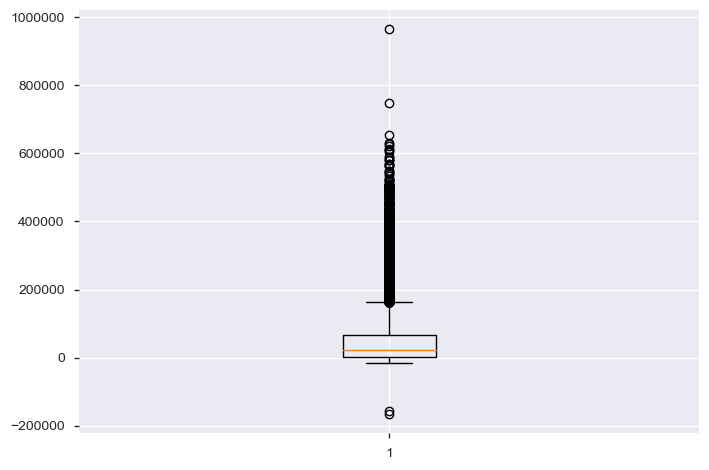

In [5]:
#import seaborn as sns
fig = plt.figure()
ax = plt.subplot(111)

 #TODO figure out how to do plotting in a loop 

ax.boxplot(df['BILL_AMT1'] , positions = [1])
#ax.boxplot(df['BILL_AMT2'], positions = [2])
#ax.boxplot(df['BILL_AMT3'], positions = [3])
#ax.boxplot(df['BILL_AMT4'], positions = [4])
#ax.boxplot(df['BILL_AMT5'], positions = [5])
#ax.boxplot(df['BILL_AMT6'], positions = [6])
plt.show()


as we can see from above box plots there are certainly some values that are excessively high for each type of bill amount considering their mean and median values.

In [ ]:
fig = plt.figure()
ax = plt.subplot(111)

ax.boxplot(df['PAY_AMT1'] , positions = [1])
ax.boxplot(df['PAY_AMT2'], positions = [2])
ax.boxplot(df['PAY_AMT3'], positions = [3])
ax.boxplot(df['PAY_AMT4'], positions = [4])
ax.boxplot(df['PAY_AMT5'], positions = [5])
ax.boxplot(df['PAY_AMT6'], positions = [6])

In [ ]:
# filter the amout greater than 25000 to find median values visible since outliers will not affect 
# the median values

fig = plt.figure()
ax = plt.subplot(111)

len(df[df['PAY_AMT1']>40000]['PAY_AMT1'])

df[df['PAY_AMT1']>40000]['PAY_AMT1'].hist(bins=200)

df['PAY_AMT1'].hist(bins=200)




#ax.boxplot(df[df['PAY_AMT1']<8000]['PAY_AMT1'] , positions = [1])
#ax.boxplot(df[df['PAY_AMT2']>25000]['PAY_AMT2'], positions = [2])


In [ ]:
pd.crosstab(df['PAY_0'],df['default.payment.next.month'] , normalize =True).plot(kind = 'bar', stacked=True)

In [ ]:
df_contin = df[['BILL_AMT1' , 'BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5','BILL_AMT6',
                'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']]
#pd.plotting.scatter_matrix(df_contin)
#plt.show()

In [ ]:
import numpy as np
corr= df_contin.corr()
corr= corr.round(decimals=4 )

fig, ax = plt.subplots(figsize = (15,20))
im = ax.imshow(corr)

# We want to show all ticks...
ax.set_xticks(np.arange(len(corr.index)))
ax.set_yticks(np.arange(len(corr.columns)))
# ... and label them with the respective list entries
ax.set_xticklabels(corr.index)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=60, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(corr.index)):
    for j in range(len(corr.columns)):
        text = ax.text(j, i, corr[corr.index[i]][corr.columns[j]],
                       ha="center", va="center", color="w")

ax.set_title("correlation ")
fig.tight_layout()
plt.show()





In [ ]:
corr

There seems to be a positive  correlation between bill amounts but there is little correlation between bill amount and payment amount and between payment amounts.
as payments time increases  the correlation decreases.

In [ ]:
longer_default = df[df['PAY_0']>3]
pd.crosstab(longer_default['PAY_0'],longer_default['default.payment.next.month'] ).plot(kind = 'bar', stacked=True)

In [ ]:
shorter_default = df[df['PAY_0']<=3]
pd.crosstab(shorter_default['PAY_0'],shorter_default['default.payment.next.month'] ).plot(kind = 'bar', stacked=True)

In [ ]:
df_low_pay = df[df['PAY_0']<3]
pd.crosstab(df_low_pay['default.payment.next.month'] , df_low_pay['PAY_0']).plot(kind = 'bar')

df_high_pay = df[df['PAY_0']>=3]
pd.crosstab(df_high_pay['default.payment.next.month'] , df_high_pay['PAY_0']).plot(kind = 'bar')

In [ ]:
df_low_pay = df[df['PAY_2']<3]
pd.crosstab(df_low_pay['default.payment.next.month'] , df_low_pay['PAY_2']).plot(kind = 'bar')

df_low_pay = df[df['PAY_2']>=3]
pd.crosstab(df_low_pay['default.payment.next.month'] , df_low_pay['PAY_2']).plot(kind = 'bar')

from above two box plots it looks like the there are more people who defaulted for PAY_0 values greater than or equal 3. that is  if payment delay were more than or equal to 3 months then more default than for those when delay is less than 3  months. 

In [ ]:
pd.crosstab(df_high_pay['default.payment.next.month'] , df_high_pay['PAY_0'])

In [ ]:
df['default'] = df['default.payment.next.month']

In [ ]:
pd.crosstab(df['default.payment.next.month'] , df['PAY_0']).plot(kind = 'box')

In [ ]:
pd.crosstab(df['default.payment.next.month'] , df['PAY_2']).plot(kind = 'box')

In [ ]:
pd.crosstab(df['default'] , df['PAY_3']).plot(kind = 'box')

In [ ]:
edu_default = pd.crosstab(df.default , df.EDUCATION) 

In [ ]:
edu_default.plot(kind = 'bar', stacked = True)

In [ ]:
sex_edu = pd.crosstab(df.default , df.SEX) 

In [ ]:
sex_edu.plot(kind= 'bar')

In [ ]:
age_def = pd.crosstab(df['AGE'] , df['default'])

In [ ]:
#age_def.plot()
#df[df['default']==0].LIMIT_BAL.hist()
#df.PAY_2.nunique()
#df[df['default']==0].LIMIT_BAL.hist()
#df.BILL_AMT2.hist()
#df.PAY_AMT3.hist()
#df.plot.scatter('ID' , 'BILL_AMT2' )
df[df['BILL_AMT2'] < 400000].plot.scatter('ID' , 'BILL_AMT2' )

In [ ]:
#df['PAY_AMT4'].plot(kind = 'box')
#df[df['BILL_AMT2'] < 400000][['default', 'BILL_AMT2']].plot( kind = 'box')